In [1]:
import re
import tarfile
from pathlib import Path
from time import time
from functools import reduce
from pprint import pprint
from typing import List, Tuple

import numpy as np
import pandas as pd
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, concatenate, Input,Convolution2D, MaxPooling1D, Dense, Dropout, Flatten,LSTM
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Dense, Dropout, Activation
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.keras.models import Sequential
from tqdm import tqdm

In [2]:
#import the already preprocessed dataset 
sdg_df  = pd.read_csv('sdg_classification_data.csv')
sdg_df

,Unnamed: 0,extracted,extracted_abstract,extracted_title,initial_text,sdg,extracted_title_tokenized,extracted_abstract_tokenized,initial_text_tokenized
0,0,True,paper attempts empirically analyze compatibili...,trade liberalization policies aligned renewabl...,trade liberalization policies aligned renewabl...,SDG10,"['trade', 'liberalization', 'policies', 'align...","['paper', 'attempts', 'empirically', 'analyze'...","['trade', 'liberalization', 'policies', 'align..."
1,1,True,aim study determine nature relationship renewa...,oil prices macroeconomic factors policies affe...,oil prices macroeconomic factors policies affe...,SDG10,"['oil', 'prices', 'macroeconomic', 'factors', ...","['aim', 'study', 'determine', 'nature', 'relat...","['oil', 'prices', 'macroeconomic', 'factors', ..."
2,2,True,study combines panel data techniques wavelet s...,energy consumption gdp revisited new panel dat...,energy consumption gdp revisited new panel dat...,SDG10,"['energy', 'consumption', 'gdp', 'revisited', ...","['study', 'combines', 'panel', 'data', 'techni...","['energy', 'consumption', 'gdp', 'revisited', ..."
3,3,True,environmental issues dependence fossil fuel so...,multiple perspective modeling simulation appro...,multiple perspective modeling simulation appro...,SDG10,"['multiple', 'perspective', 'modeling', 'simul...","['environmental', 'issues', 'dependence', 'fos...","['multiple', 'perspective', 'modeling', 'simul..."
4,4,True,environmental issues dependence fossil fuel so...,multiple perspective modeling simulation appro...,multiple perspective modeling simulation appro...,SDG10,"['multiple', 'perspective', 'modeling', 'simul...","['environmental', 'issues', 'dependence', 'fos...","['multiple', 'perspective', 'modeling', 'simul..."
5,5,True,blockchain technology ushering nothing short d...,integrating blockchain technology energy secto...,integrating blockchain technology energy secto...,SDG10,"['integrating', 'blockchain', 'technology', 'e...","['blockchain', 'technology', 'ushering', 'noth...","['integrating', 'blockchain', 'technology', 'e..."
6,6,True,blockchain technology ushering nothing short d...,integrating blockchain technology energy secto...,integrating blockchain technology energy secto...,SDG10,"['integrating', 'blockchain', 'technology', 'e...","['blockchain', 'technology', 'ushering', 'noth...","['integrating', 'blockchain', 'technology', 'e..."
7,7,True,paper estimates impact renewable energy econom...,renewable energy consumption economic growth n...,renewable energy consumption economic growth n...,SDG10,"['renewable', 'energy', 'consumption', 'econom...","['paper', 'estimates', 'impact', 'renewable', ...","['renewable', 'energy', 'consumption', 'econom..."
8,8,True,paper estimates impact renewable energy econom...,renewable energy consumption economic growth n...,renewable energy consumption economic growth n...,SDG10,"['renewable', 'energy', 'consumption', 'econom...","['paper', 'estimates', 'impact', 'renewable', ...","['renewable', 'energy', 'consumption', 'econom..."
9,9,True,increasing concerns environmental economic imp...,optimal renewable energy supply choices netzer...,optimal renewable energy supply choices netzer...,SDG10,"['optimal', 'renewable', 'energy', 'supply', '...","['increasing', 'concerns', 'environmental', 'e...","['optimal', 'renewable', 'energy', 'supply', '..."


In [3]:
sdg_df = sdg_df.drop(['Unnamed: 0'],axis = 1)
sdg_df

,extracted,extracted_abstract,extracted_title,initial_text,sdg,extracted_title_tokenized,extracted_abstract_tokenized,initial_text_tokenized
0,True,paper attempts empirically analyze compatibili...,trade liberalization policies aligned renewabl...,trade liberalization policies aligned renewabl...,SDG10,"['trade', 'liberalization', 'policies', 'align...","['paper', 'attempts', 'empirically', 'analyze'...","['trade', 'liberalization', 'policies', 'align..."
1,True,aim study determine nature relationship renewa...,oil prices macroeconomic factors policies affe...,oil prices macroeconomic factors policies affe...,SDG10,"['oil', 'prices', 'macroeconomic', 'factors', ...","['aim', 'study', 'determine', 'nature', 'relat...","['oil', 'prices', 'macroeconomic', 'factors', ..."
2,True,study combines panel data techniques wavelet s...,energy consumption gdp revisited new panel dat...,energy consumption gdp revisited new panel dat...,SDG10,"['energy', 'consumption', 'gdp', 'revisited', ...","['study', 'combines', 'panel', 'data', 'techni...","['energy', 'consumption', 'gdp', 'revisited', ..."
3,True,environmental issues dependence fossil fuel so...,multiple perspective modeling simulation appro...,multiple perspective modeling simulation appro...,SDG10,"['multiple', 'perspective', 'modeling', 'simul...","['environmental', 'issues', 'dependence', 'fos...","['multiple', 'perspective', 'modeling', 'simul..."
4,True,environmental issues dependence fossil fuel so...,multiple perspective modeling simulation appro...,multiple perspective modeling simulation appro...,SDG10,"['multiple', 'perspective', 'modeling', 'simul...","['environmental', 'issues', 'dependence', 'fos...","['multiple', 'perspective', 'modeling', 'simul..."
5,True,blockchain technology ushering nothing short d...,integrating blockchain technology energy secto...,integrating blockchain technology energy secto...,SDG10,"['integrating', 'blockchain', 'technology', 'e...","['blockchain', 'technology', 'ushering', 'noth...","['integrating', 'blockchain', 'technology', 'e..."
6,True,blockchain technology ushering nothing short d...,integrating blockchain technology energy secto...,integrating blockchain technology energy secto...,SDG10,"['integrating', 'blockchain', 'technology', 'e...","['blockchain', 'technology', 'ushering', 'noth...","['integrating', 'blockchain', 'technology', 'e..."
7,True,paper estimates impact renewable energy econom...,renewable energy consumption economic growth n...,renewable energy consumption economic growth n...,SDG10,"['renewable', 'energy', 'consumption', 'econom...","['paper', 'estimates', 'impact', 'renewable', ...","['renewable', 'energy', 'consumption', 'econom..."
8,True,paper estimates impact renewable energy econom...,renewable energy consumption economic growth n...,renewable energy consumption economic growth n...,SDG10,"['renewable', 'energy', 'consumption', 'econom...","['paper', 'estimates', 'impact', 'renewable', ...","['renewable', 'energy', 'consumption', 'econom..."
9,True,increasing concerns environmental economic imp...,optimal renewable energy supply choices netzer...,optimal renewable energy supply choices netzer...,SDG10,"['optimal', 'renewable', 'energy', 'supply', '...","['increasing', 'concerns', 'environmental', 'e...","['optimal', 'renewable', 'energy', 'supply', '..."


In [4]:
X = sdg_df.drop(['sdg','initial_text','extracted', 'extracted_title_tokenized', 'extracted_abstract_tokenized','initial_text_tokenized'], axis=1)
y = sdg_df['sdg']
X

,extracted_abstract,extracted_title
0,paper attempts empirically analyze compatibili...,trade liberalization policies aligned renewabl...
1,aim study determine nature relationship renewa...,oil prices macroeconomic factors policies affe...
2,study combines panel data techniques wavelet s...,energy consumption gdp revisited new panel dat...
3,environmental issues dependence fossil fuel so...,multiple perspective modeling simulation appro...
4,environmental issues dependence fossil fuel so...,multiple perspective modeling simulation appro...
5,blockchain technology ushering nothing short d...,integrating blockchain technology energy secto...
6,blockchain technology ushering nothing short d...,integrating blockchain technology energy secto...
7,paper estimates impact renewable energy econom...,renewable energy consumption economic growth n...
8,paper estimates impact renewable energy econom...,renewable energy consumption economic growth n...
9,increasing concerns environmental economic imp...,optimal renewable energy supply choices netzer...


In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
X_title_train = X_train['extracted_title']
X_abstract_train = X_train['extracted_abstract']
X_title_test = X_test['extracted_title']
X_abstract_test = X_test['extracted_abstract']

maxlen = 500
tokenizer = Tokenizer(num_words=50000)
word_index = tokenizer.word_index

tokenizer.fit_on_texts(X_title_train.astype(str))
X_title_train = tokenizer.texts_to_sequences(X_title_train.astype(str))
X_title_train = pad_sequences(X_title_train, padding='post', maxlen=maxlen)

tokenizer.fit_on_texts(X_abstract_train.astype(str))
X_abstract_train = tokenizer.texts_to_sequences(X_abstract_train.astype(str))
X_abstract_train = pad_sequences(X_abstract_train, padding='post', maxlen=maxlen)

tokenizer.fit_on_texts(X_title_test.astype(str))
X_title_test = tokenizer.texts_to_sequences(X_title_test.astype(str))
X_title_test = pad_sequences(X_title_test, padding='post', maxlen=maxlen)

tokenizer.fit_on_texts(X_abstract_test.astype(str))
X_abstract_test = tokenizer.texts_to_sequences(X_abstract_test.astype(str))
X_abstract_test = pad_sequences(X_abstract_test, padding='post', maxlen=maxlen)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 500
#X_title_train = tokenizer.texts_to_sequences(X1_train)
#X1_test = tokenizer.texts_to_sequences(X1_test)

#X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
#X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)
X_title_test

array([[1215, 1547, 1760, ...,    0,    0,    0],
       [1735,  690,   18, ...,    0,    0,    0],
       [ 130,  389,   18, ...,    0,    0,    0],
       ...,
       [  21,  118,  770, ...,    0,    0,    0],
       [ 949,   22,    5, ...,    0,    0,    0],
       [1206,  466,  122, ...,    0,    0,    0]])

In [34]:
vocab_size

13201

In [35]:
input_1 = Input(shape=(maxlen,))
input_2 = Input(shape=(maxlen,))

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 500, 300)     3960300     input_7[0][0]                    
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 500, 300)     3960300     input_8[0][0]                    
______________________________________________________________________________________

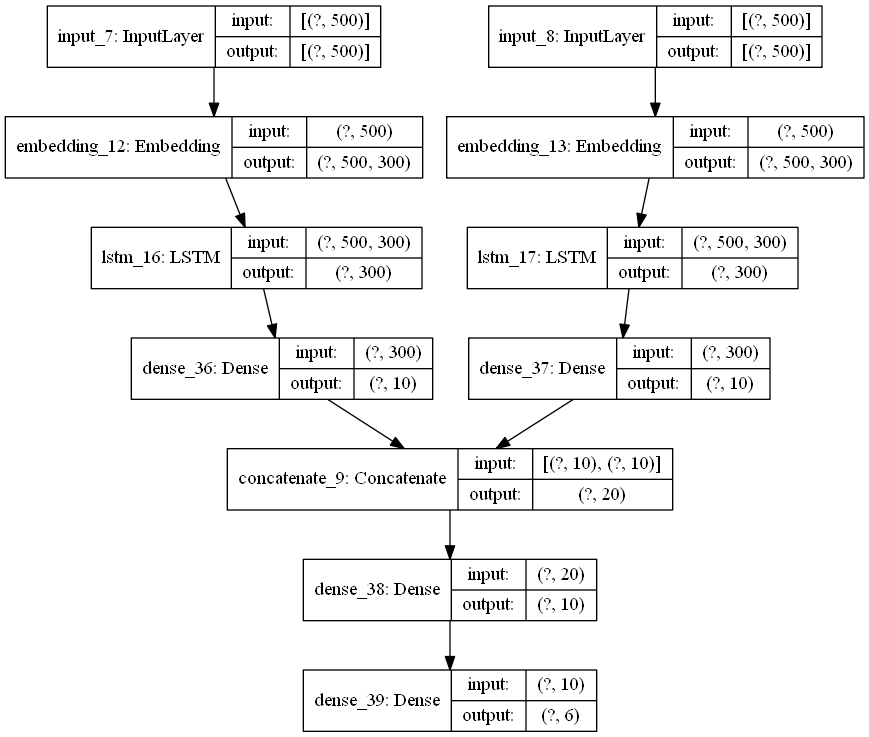

In [36]:
#Model Setup
import keras
from numpy import zeros
from keras.models import Sequential
from keras.layers import SpatialDropout1D 
from tensorflow.python.keras.callbacks import EarlyStopping
from keras.layers.merge import Concatenate

embedding_matrix = zeros((vocab_size, 300))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1 = LSTM(300,dropout=0.2, recurrent_dropout=0.2)(embedding_layer)
dense_layer_1 =Dense(10, activation='relu')(LSTM_Layer_1)

embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input_2)
LSTM_Layer_2 = LSTM(300,dropout=0.2, recurrent_dropout=0.2)(embedding_layer)
dense_layer_2 =Dense(10, activation='relu')(LSTM_Layer_2)

concat_layer = Concatenate()([dense_layer_1, dense_layer_2])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(6, activation='softmax')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x=[X_abstract_train, X_abstract_train], y=y_train, batch_size=64, epochs=5, verbose=1, validation_data=([X_title_test, X_abstract_test],y_test))

Epoch 1/5
 3/12 [======>.......................] - ETA: 0s - loss: 1.7918 - acc: 0.046 - ETA: 37:38 - loss: 1.7915 - acc: 0.18 - ETA: 1:02:10 - loss: 1.7911 - acc: 0.2031

In [31]:
score = model.evaluate(x=[X_abstract_test, X_title_test], y=y_test, verbose=1)
score

6/6 [==============================] - ETA: 0s - loss: 1.7551 - acc: 0.187 - ETA: 2s - loss: 1.7585 - acc: 0.203 - ETA: 2s - loss: 1.7549 - acc: 0.187 - ETA: 1s - loss: 1.7540 - acc: 0.218 - ETA: 0s - loss: 1.7570 - acc: 0.218 - ETA: 0s - loss: 1.7591 - acc: 0.222 - 7s 1s/step - loss: 1.7591 - acc: 0.2222


[1.7591444253921509, 0.2222222238779068]